### 2. 〈서울시 인터넷 쇼핑몰 100개 평가 정보〉 전체평가 최상위 브랜드와 최하위 브랜드 비교 (2020)  
- 2020년도 전체평가 기준 최상위 브랜드인 '마켓컬리'와 최하위 브랜드인 '트립닷컴'의 카테고리별 세부 점수를 비교하여 막대그래프로 시각화하였다.

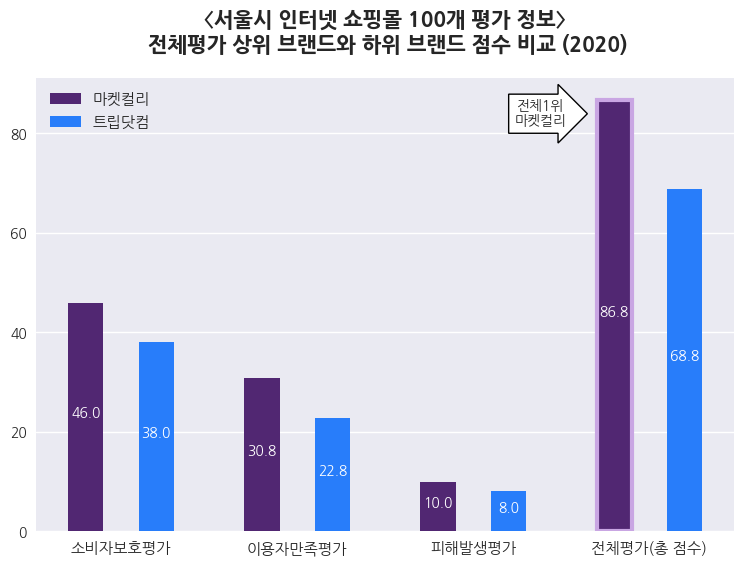

In [1]:
## 오라클 연동
import cx_Oracle
import pandas as pd

dsn = cx_Oracle.makedsn("DESKTOP-*******", ****, 'xe') 
db = cx_Oracle.connect('c##*****', '*****', dsn)
cursor = db.cursor() 
cursor.execute(""" select * from shop100 """) 
row = cursor.fetchall() 
shop = pd.DataFrame(row)
colname = cursor.description 
col = []

for i in colname: 
    col.append(i[0])
    
shop.columns = col

shop2020 = shop[:][shop['평가년도'] == 2020]

# 2020년도 전체평가 1위와 100위 추출
rank1 = shop2020.sort_values(by = '전체평가', ascending = False).head(1)
rank100 = shop2020.sort_values(by = '전체평가', ascending = False).tail(1)
result = pd.concat([rank1, rank100])

# 원하는 컬럼만 추출
result2 = result.copy()[['소비자보호평가', '이용자만족평가', '피해발생평가', '전체평가']]

# 컬럼 선택하여 이름 변경하기
result2.rename(columns = {'전체평가':'전체평가(총 점수)'}, inplace = True)

# 인덱스 설정
result2.index = result['쇼핑몰명'].values

# 데이터프레임 전치
result2 = result2.T

## 그래프 그리기
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib 
import numpy as np

# 테마 변경
plt.style.use(['seaborn'])

# 한글 폰트 사용
font_path = "c:/Windows/Fonts/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 1x1 figure matrix 생성
fig, ax = plt.subplots(1, 1, figsize = (9, 6), dpi = 100)

# x축 범위 설정
index = np.arange(len(result2))

# 막대 그래프 생성
bar_width = 0.2

b1 = ax.bar(index, 
            result2['마켓컬리'], 
            bar_width, 
            color = '#512772', 
            label = '마켓컬리')

b1[3].set(edgecolor = '#c9a6e3',
          linewidth = 3)

b2 = ax.bar(index + 2 * bar_width,
            result2['트립닷컴'],  
            bar_width, 
            color = '#287DFA', 
            label = '트립닷컴')

# 그리드 설정
ax.set_axisbelow(True) # 그리드가 바 뒤에 오게 설정
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# x 축 위치 조정, 이름 설정
xticks = np.arange(bar_width, 4 + bar_width, 1)
xticks_labels = result2.index

ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels,
                   fontsize = 11)

# title 설정
title = '〈서울시 인터넷 쇼핑몰 100개 평가 정보〉\n 전체평가 상위 브랜드와 하위 브랜드 점수 비교 (2020)' # 제목
title_dict = {'fontsize' : 15,
              'fontweight' : 'bold'}

ax.set_title(title,
             pad = 20, 
             fontdict = title_dict)

# 막대 그래프 내부 텍스트 표시
for i,x in enumerate(b1.patches):
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate( "{:.1f}".format(result2['마켓컬리'].values[i]),
                 (left + width/2, bottom + height/2),
                 ha = 'center', 
                 size = 10, 
                 color = 'white')
    
for i,x in enumerate(b2.patches):
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate( "{:.1f}".format(result2['트립닷컴'].values[i]),
                 (left + width/2, bottom + height/2),
                 ha = 'center', 
                 size = 10, 
                 color = 'white')
    
# 범례 설정
ax.legend(fontsize = 11)

# 주석 설정
(x, y) = b1.patches[3].get_xy()
w = b1.patches[3].get_width()
h = b1.patches[3].get_height()

ax.annotate(xy = (x - 1.6*w, h - 5),
            text = '전체1위\n마켓컬리',
            ha = 'center',
            bbox = dict(boxstyle = "rarrow, pad = 0.4", 
                        fc = "w", 
                        ec = "black", 
                        lw = 1) )

plt.show()